<a href="https://colab.research.google.com/github/phaa/dio-baires-dev/blob/main/segmentacao-imagens-numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de segmentação de imagens do zero usando numpy
## Parte do treinamento da Dio Baires Dev

### Análise de imagens digitais: princípios, algoritmos e aplicações
Hélio Pedrini; William Robson Schwartz

Usei esse livro da biblioteca da pós graduação como base.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

In [11]:
# Upload do arquivo
uploaded = files.upload()

# Carregar a imagem
for filename in uploaded.keys():
    imagem = Image.open(filename).convert('RGB')  # Converte para escala de cinza
    print(f"Imagem carregada: {filename}")


Saving bicudo04.png to bicudo04 (1).png
Imagem carregada: bicudo04 (1).png


(398, 530, 3)


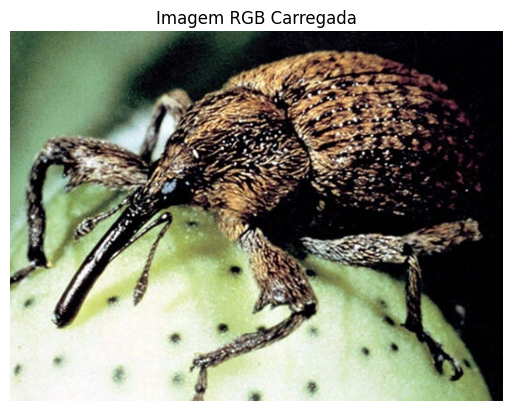

In [18]:
# Converter a imagem em um array NumPy
imagem_array = np.array(imagem)

# Verificar as dimensões da imagem
print(imagem_array.shape)

# Exibir a imagem RGB corretamente
plt.imshow(imagem_array)
plt.title('Imagem RGB Carregada')
plt.axis('off')
plt.show()

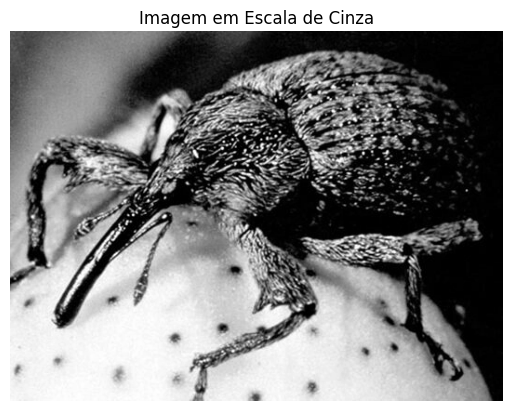

In [29]:
# Separar os canais R, G e B
R = imagem_array[:, :, 0]
G = imagem_array[:, :, 1]
B = imagem_array[:, :, 2]

# Aplicar fórmula de escala de cinza
# https://pt.wikipedia.org/wiki/N%C3%ADvel_de_cinza
# Usamos astype pois não se usa float em pixels de imagens
imagem_cinza = (0.2989 * R + 0.5870 * G + 0.1140 * B).astype(np.uint8)

# Exibir a imagem em escala de cinza
# OBS: quando plotamos uma imagem RGB de 3 canais o matplotlib exibe direito,
# mas quando usamos apenas um canal de cor (Cinza) a biblioteca interpreta como
# um mapa de cores padrão (viridis)
plt.imshow(imagem_cinza, cmap='gray')
plt.title('Imagem em Escala de Cinza')
plt.axis('off')
plt.show()

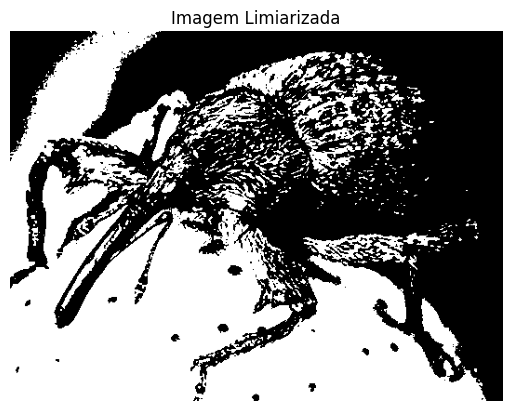

In [30]:
# Definir um limiar
limiar = 127

# Aplicar limiarização global
imagem_limiarizada = np.where(imagem_cinza > limiar, 255, 0).astype(np.uint8)

# Exibir imagem limiarizada
plt.imshow(imagem_limiarizada, cmap='gray')
plt.title('Imagem Limiarizada')
plt.axis('off')
plt.show()